In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from Hamster39 import myHamster

In [10]:
myHamster

<function Hamster39.myHamster(Xs, Xg, Id)>

# Question 1

In [11]:
hamster = np.vectorize(myHamster)

In [12]:
trail = 0
Xg = 1
bals = [1]  # init Xs
u = [1]  # init u(Xs)
while trail <= 5:
    trail += 1
    balance = np.linspace(0, Xg, num=2000)[hamster(
        np.linspace(0, Xg, num=2000), Xg, 320).sum()]
    bals.append(balance)
    u.append(u[trail-1]*0.5)
    Xg = balance


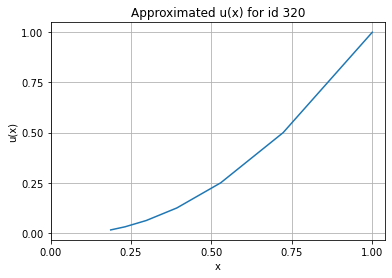

In [13]:
plt.plot(bals,u)
plt.title("Approximated u(x) for id 320")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.xticks(np.arange(0,1.25,0.25))
plt.yticks(np.arange(0,1.25,0.25))
plt.grid()
plt.show()

# Question 2

In [14]:
PI = "\u03C0"
ALPHA = "\u03B1"
SIGMA = "\u03C3"

2.1

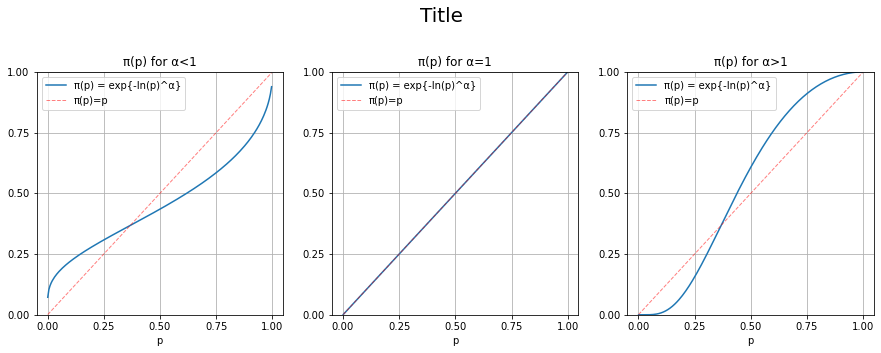

In [15]:
p = np.arange(start=0.001, stop=1, step=0.005)  # can't take log of zero
alpha = [0.5, 1, 1.9]
signs = ["<", "=", ">"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(alpha)):
    pi = np.exp(-((-np.log(p))**alpha[i]))

    ax[i].plot(p, pi, label=PI+"(p) = exp{-ln(p)^"+ALPHA+"}")
    ax[i].set_title(PI+"(p) for "+ALPHA+signs[i]+"1")
    ax[i].set_xlabel("p")
    ax[i].set_ylim(0, 1)
    ax[i].grid()
    ax[i].plot(p, p, linestyle="--", alpha=0.5, lw=1, c="r", label=PI+"(p)=p")
    ax[i].set_xticks(np.arange(0, 1.25, step=0.25))
    ax[i].set_yticks(np.arange(0, 1.25, step=0.25))
    ax[i].legend()

fig.suptitle("Title", fontsize=20)
fig.subplots_adjust(top=0.8)
plt.show()


Differences between alpha's and the effect on the tendency to the gumbling option
alpha<1:\ Overestimation of low probabilities and underestimation of high ones, corresponding with the "prospect theory". Suppose the hamster has an high p to get the peanuts in the gambling option, it would treat its decision as if it has lower probabilities to get the peanuts. On the other hand, it would be scared from the 1-p prob. to don't get the peanuts at all more than it should be. Therfore, it would choose the gambling option less times as it should be to maximize its gain expectation. In contrary, suppose the hamster has low p to get the peanuts, it would choose to gamble more times than it should be to maximize its gain expectation.

alpha=1:\ The tendency of the hamster to gumble is determined directly by the real probabilities to gain the peanuts.

alpha>1:\ Overestimation of high probabilities and underestimation of low ones. The reverse tendency of alpha<1: Suppuse to gumbling has high gain probabilities - the hamster would be even braver than it should be and would choose the this option a lot. Lower p to gain would cause to over fear from the hamster and it would tend not to gamble and choose the safe option even more than it should be.

Similarities between the alpha's
The pi function "skew" the real probabilities, representing the probabilities as they are perceived in the hamster's mind (excluding alpha=1 exactly).

2.2

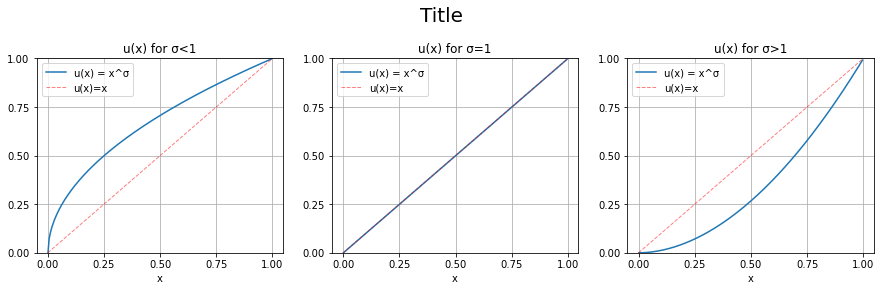

In [16]:
x = np.arange(start=0,stop=1,step=0.005)
sigma = [0.5,1,1.9]
signs = ["<","=",">"]

fig, ax = plt.subplots(1,3, figsize=(15,4))
for i in range(len(sigma)):
  u = x**sigma[i]
  
  ax[i].plot(p,u, label="u(x) = x^"+SIGMA)
  ax[i].set_title("u(x) for "+SIGMA+signs[i]+"1")
  ax[i].set_xlabel("x")
  ax[i].set_ylim(0,1)
  ax[i].grid()
  ax[i].plot(x,x,linestyle="--", alpha=0.5, lw=1, c="r", label="u(x)=x")
  ax[i].set_xticks(np.arange(0,1.25,step=0.25))
  ax[i].set_yticks(np.arange(0,1.25,step=0.25))
  ax[i].legend()

fig.suptitle("Title", fontsize=20)
fig.subplots_adjust(top=0.8)
plt.show()

2.4

In [17]:
# load experiment from matlab
expr = pd.DataFrame()
for key in loadmat("ex9_q2_data.mat"):
  if type(loadmat("ex9_q2_data.mat")[key])==type(np.zeros((2,3))):
    expr = pd.concat([expr,pd.DataFrame(loadmat("ex9_q2_data.mat")[key].reshape(-1),columns=[key])], axis=1)
expr["p"] = expr["p"].apply(lambda p: p/100)
expr["choice"] = expr["choice"].map({2:"s",1:"g"})
# Xg and p have one-to-one relationship, we'll drop p for make the processing simpler
Xg_p_dict = {}
for t in expr[['Xg','p']].drop_duplicates().set_index("Xg").itertuples():
  Xg_p_dict[t[0]] = t[1]
Xg_p_dict

{150: 0.7, 400: 0.9, 500: 0.1, 700: 0.55, 5000: 0.99, 10000: 0.002, 2000: 0.06}

In [18]:
# results with multindexing pandas
results = expr.groupby(["subject","h","Xg","choice"]).agg({"Xs":lambda x: x.tolist()}).transpose()
results

subject        1                                                    \
h               1                                                    
Xg          150                                              400     
choice          g                          s                     g   
Xs       [50, 50]  [100, 66, 83, 54, 60, 52]  [133, 147, 162, 167]   

subject                                                               \
h                                                                      
Xg                                500                                  
choice                      s         g                            s   
Xs       [266, 177, 222, 172]  [18, 37]  [167, 333, 56, 112, 43, 50]   

subject                                                    \
h                                                           
Xg              700                                 2000    
choice              g                        s          g   
Xs       [25, 51, 59]  [233, 467, 77, 155, 68]  [147, 22]   

subject                                 ...                         30  \
h                                       ...                          2   
Xg                                      ...                      400     
choice                               s  ...                          s   
Xs       [666, 1333, 221, 444, 72, 47]  ...  [266, 237, 252, 227, 232]   

subject                                                                        \
h                                                                               
Xg                       500                                            700     
choice                       g               s                              g   
Xs       [112, 18, 37, 43, 50]  [167, 333, 56]  [77, 155, 181, 207, 215, 224]   

subject                                                         \
h                                                                
Xg                      2000                                     
choice            s         g                                s   
Xs       [233, 467]  [72, 97]  [666, 1333, 221, 444, 147, 122]   

subject                                                      \
h                                                             
Xg                    5000                                    
choice                    g                               s   
Xs       [1667, 3333, 3888]  [4444, 4073, 4259, 3949, 4011]   

subject                                                
h                                                      
Xg                                              10000  
choice                                              s  
Xs       [3333, 6666, 1111, 2222, 370, 741, 122, 246]  

[1 rows x 780 columns]

In [19]:
''' rules according to the Note in the ex9 directions '''
def find_balance(row, Xg):
  if len(row.index) == 2:
    return np.mean([np.min(row["s"]), np.max(row["g"])])
  elif "s" in row.index:
    return np.mean([0,np.min(row["s"])])
  else: # only gambling
    return np.mean([Xg,np.max(row["g"])])


processing = pd.Series()
for i in range (1,31):
  for h in [1,2]:
    for Xg in Xg_p_dict.keys():
      balance = results[i,h,Xg].apply(lambda row: find_balance(row=row,Xg=Xg), axis=1)
      processing.loc["_".join([str(i),str(h),str(Xg)])] = balance

processing = processing.apply(lambda x: x.values[0])
obs = pd.DataFrame.from_records(processing.index.str.split("_"), columns=["subject","h","Xg"])
obs = obs.astype(int)

obs["p"] = obs["Xg"].apply(lambda Xg: Xg_p_dict[Xg])
obs["Xs"] = processing.values
# depended and independed variables as we found in q. 2.3
obs["x"] = np.log(-np.log(obs["p"]))
obs["y"] = np.log(-np.log(obs["Xs"]/obs["Xg"]))
lm = obs.groupby(["subject","h"])["x","y"].agg(lambda x: x.tolist())
params = lm.apply(lambda row: np.polyfit(row["x"], row["y"], 1), axis=1)
alpha = params.apply(lambda lst: lst[0]) # unpacking alpha
sigma = params.apply(lambda lst: np.exp(-lst[1])) # unpacking sigma
lm["alpha"], lm["sigma"] = alpha , sigma
lm[["alpha", "sigma"]]

C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_27256/301916200.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  processing = pd.Series()
C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_27256/301916200.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  lm = obs.groupby(["subject","h"])["x","y"].agg(lambda x: x.tolist())


alpha     sigma
subject h                    
1       1  0.378442  0.464979
        2  0.610302  0.564987
2       1  0.589914  0.578437
        2  0.618548  0.597233
3       1  0.682697  0.887746
        2  0.645998  0.794806
4       1  0.384650  0.838725
        2  0.314972  0.898790
5       1  0.620445  0.532713
        2  0.522244  0.495497
6       1  0.389769  0.918626
        2  0.533485  0.690198
7       1  0.456037  0.483448
        2  0.457004  0.456831
8       1  0.676004  0.800892
        2  0.711994  0.733048
9       1  0.769450  0.934794
        2  0.611956  0.619133
10      1  0.543197  0.491510
        2  0.535405  0.541161
11      1  0.411423  0.709683
        2  0.432206  0.584678
12      1  0.575588  0.872567
        2  0.584147  0.839775
13      1  1.033464  0.625075
        2  0.766778  0.540716
14      1  0.380338  0.679702
        2  0.289411  0.619241
15      1  0.293541  0.375520
        2  0.444094  0.589892
16      1 -0.072533  1.980592
        2 -0.009272  2.644401
17      1  0.407244  0.447173
        2  0.596016  0.502608
18      1  0.414652  0.734284
        2  0.330619  0.783610
19      1  1.042908  0.682559
        2  1.119167  0.941372
20      1  0.648744  0.632246
        2  1.021031  0.699661
21      1  0.617958  0.647357
        2  0.535320  0.754299
22      1  0.414125  0.735159
        2  0.444371  0.733055
23      1  0.425893  0.811819
        2  0.436144  0.907007
24      1  0.477762  0.360133
        2  0.464239  0.387211
25      1  1.045792  0.541137
        2  1.163953  0.712723
26      1  0.504150  0.864473
        2  0.437273  0.891141
27      1  0.599635  0.632968
        2  0.507010  0.645594
28      1  0.434432  0.395500
        2  0.468394  0.423263
29      1  0.598530  0.651507
        2  0.680775  0.558440
30      1  0.618067  0.764151
        2  0.451280  0.632176

In [20]:
# we've got few negative alpha's but we have to 
# remember we didn't constrain our regression to positivies
# and it's possible that the OLS linear estimator will deviate a bit 
# from the real estimator, as far as this values are closed to zero
lm[["alpha", "sigma"]].agg(["min","max"])

,alpha,sigma
min,-0.072533,0.360133
max,1.163953,2.644401


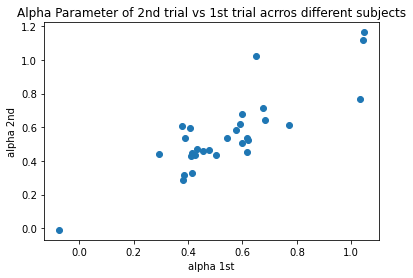

In [21]:
to_plot = lm[["alpha", "sigma"]].groupby("h").agg(lambda x: x.tolist())
plt.scatter(to_plot.loc[1,"alpha"], to_plot.loc[2,"alpha"])
plt.title("Alpha Parameter of 2nd trial vs 1st trial acrros different subjects")
plt.xlabel("alpha 1st")
plt.ylabel("alpha 2nd")
plt.show()

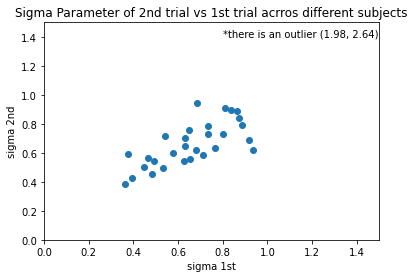

In [22]:
plt.scatter(to_plot.loc[1,"sigma"], to_plot.loc[2,"sigma"])
plt.title("Sigma Parameter of 2nd trial vs 1st trial acrros different subjects")
plt.text(0.8,1.4, s="*there is an outlier (1.98, 2.64)")
plt.xlabel("sigma 1st")
plt.xlim(0,1.5)
plt.ylim(0,1.5)
plt.ylabel("sigma 2nd")
plt.show()

In [23]:
lm.mean()


C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_27256/905109903.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lm.mean()


alpha    0.551453
sigma    0.714300
dtype: float64